In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

'''
[Compressed Sensing] Consider the same function as above
f (t) = 51 cos(2π5t) + 5 cos(2π17t) + 21 cos(2π51t)
choose the number of samples as 4096 and simulate the signal for 4 seconds. Your tasks are as follows:
h) Plot the DCT of the reconstructed signal in the previous part and overlay it with the DCT of the original
signal. What do you observe? Have you identified the frequencies correctly? If so, Congratulations! you
have implemented your first compressed sensing algorithm.
'''

f_t = lambda t: 51 * np.cos(2 * np.pi * 5 * t) + 5 * np.cos(2 * np.pi * 17 * t) + 21 * np.cos(2 * np.pi * 51 * t)
Np = 4096
t = np.linspace(0, 4, Np)
f_matrix = f_t(t)


# <center> A <center>

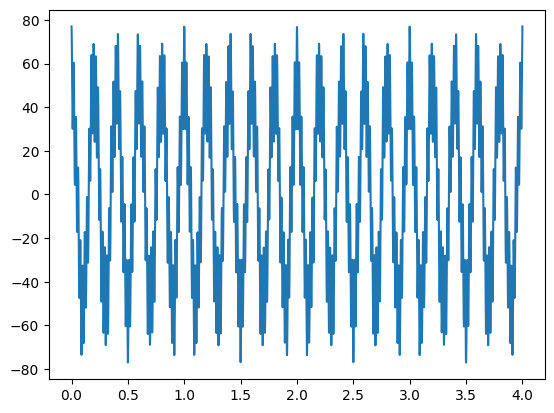

(4096,)

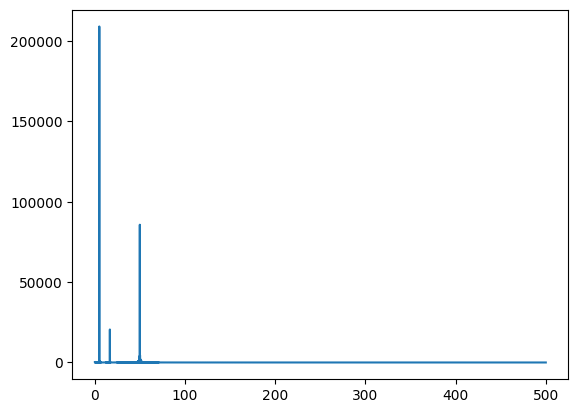

In [28]:
'''a) Plot the signal in the time domain and its direct cosine transform (dct). Scale the frequency axis
appropriately. Do you see three unique peaks?
'''

plt.plot(t, f_matrix)
plt.savefig("4a.png")
plt.show()

# DCT
reconstructed_f = fft.dct(f_matrix)
display(reconstructed_f.shape)
plt.plot(np.linspace(0, 500, Np), abs(reconstructed_f))
plt.savefig("4b.png")
plt.show()

# <center> B <center>

In [29]:
'''
b) Now, construct your Ψ matrix, i.e. a matrix of ”Cosine Modes”. These are essentially the DCT (discrete
cosine transform) of a set of orthogonal vectors of the dimension of the signal.
Psi = fft.dct(np.eye(Np))
'''
Psi = fft.dct(np.eye(Np))

# <center> C <center>

In [30]:
'''
c) Next, construct the downsampling matrix B that will pick 500 random samples from from your signal
f such that:  ̄f = B · f
Recall that now, you have constructed the following matrices:
f_bar = (B · Ψ) · x = A · x
'''
B = np.random.choice([0, 1], size=(500, Np))
f_bar = B @ f_matrix
A = B @ Psi

# <center> D <center>

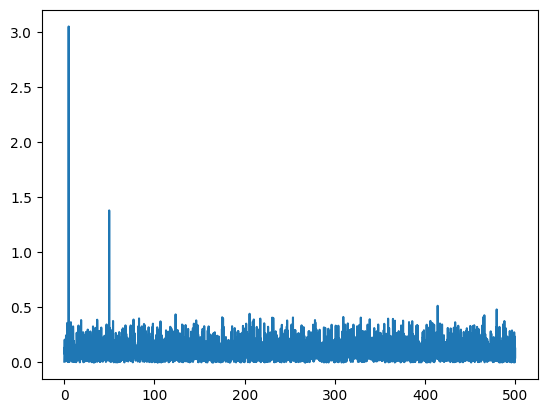

In [31]:
'''
d) There are multiple ways to solve the linear algebra problem :  ̄f = A · x. Let us first attempt to solve it
in the least squares sense, i.e.
x = A∗ ̄f
where, A∗ is the pseudo-inverse of A. The Pseudo-inverse can be obtained from the matlab command:
pinv(). Reconstruct the signal using the DCT command again (recall that the inverse DCT is the same
as DCT). Have you reconstructed the signal appropriately? What went wrong?
'''
x_f = np.linspace(0, 500, Np)
x = np.linalg.pinv(A) @ f_bar
plt.plot(x_f, abs(x))
plt.savefig("4d.png")
plt.show()


# DCT
reconstructed_f = fft.dct(x)

# <center> E <center>

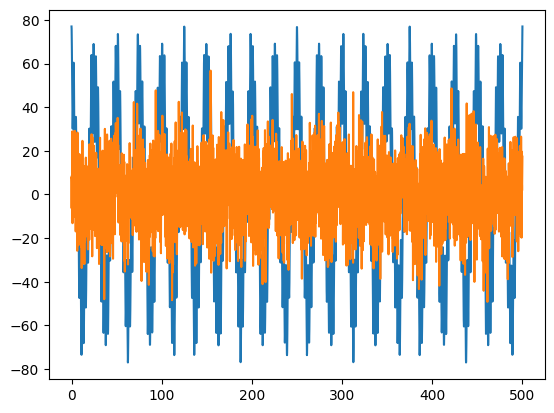

In [35]:
'''
e) (FOR GRADS) Plot the DCT of the reconstructed signal in the previous part and overlay it with the
DCT of the original signal. What do you observe? Why do you observe this? (Hint: Recall, or read up
on the least squares curve fitting. What does it do? What are its shortcomings?)
'''

plt.plot(np.linspace(0, 500, Np), f_matrix)
plt.plot(np.linspace(0, 500, Np), reconstructed_f)
plt.savefig("4e.png")
plt.show()

# <center> F <center>

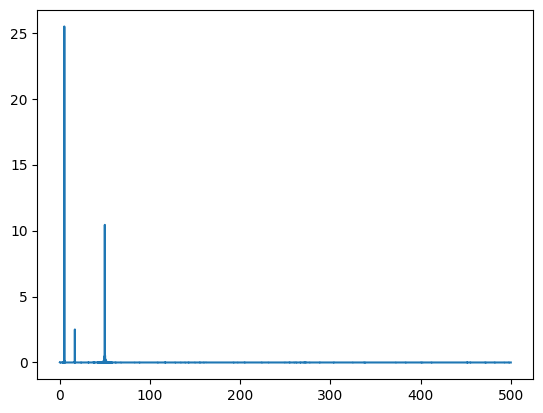

In [33]:
'''
f) Now lets perform the sparse identification of frequencies, i.e. Compressed Sensing. In order to do
this, you must install the CVX library in matlab. The following help page https://www.mathworks.com/
matlabcentral/answers/511063-installing-cvx-in-matlab should ”hopefully” help you in the process.
g) Now lets minimize the 1-norm of the coefficients x. You may use for following code-structure to perform
the optimization:
cvx_begin
variable x(n);
minimize( "ENTER YOUR CODE HERE" )
subject to
"ENTER YOUR CODE HERE"
cvx_end
Reconstruct the signal using the DCT command again (recall that the inverse DCT is the same as DCT).
Have you reconstructed the signal appropriately?
'''

# I have no idea how to use cvxpy, but Copilot did the following code
# Evan explained to me and now I understand how to use cvxpy, thanks daddy Evan
import cvxpy as cp

x = cp.Variable(Np)
objective = cp.Minimize(cp.norm(x, 1))
constraints = [A @ x == f_bar]
problem = cp.Problem(objective, constraints)
problem.solve()
x = x.value
plt.plot(x_f, abs(x))
plt.savefig("4f.png")
plt.show()

In [34]:
import numpy as np

A = [[0, 0, 1, 0], [0, 0, 0, 1], [17, -1.23, 0, 2], [-1.23, 4.08, -2, 0]]
eigenvalues = np.linalg.eigvals(A)
print(eigenvalues)


[ 3.28555682  2.50701344 -3.28555682 -2.50701344]
